In [187]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer ,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import ConfusionMatrixDisplay ,accuracy_score, classification_report, confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [188]:
data=pd.read_csv("/content/drive/MyDrive/fake job detection/fake_job_postings.csv")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [189]:
data.shape

(17880, 18)

In [190]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [191]:
columns=['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type']
for colu in columns:
  del data[colu]

In [192]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [193]:
data.fillna(' ',inplace=True)

In the next step, the dataset will be preprocessed for training. For this purpose, all the important text data is combined in one column and rest are deleted except the target column.

combine text in a single column to start cleaning our data


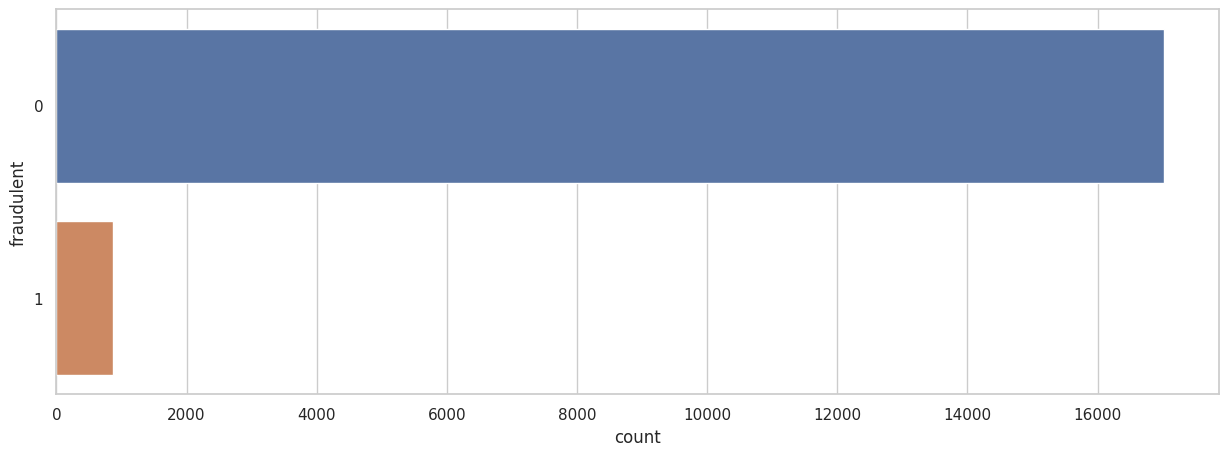

In [194]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=data)
plt.show()

In [195]:
data.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [196]:
exp=dict(data.required_experience.value_counts())
del exp[' ']

In [197]:
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

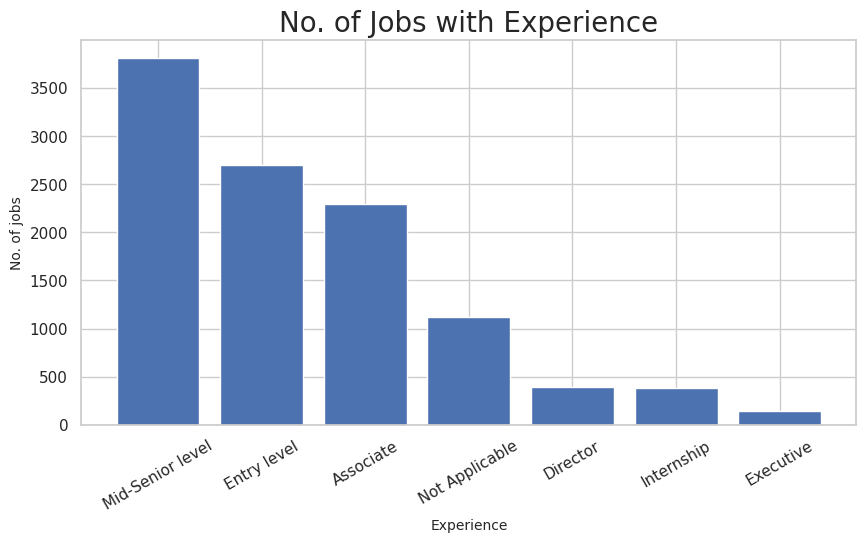

In [198]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(),exp.values())
plt.title('No. of Jobs with Experience',size=20)
plt.xlabel('Experience',size=10)
plt.ylabel('No. of jobs',size=10)
plt.xticks(rotation=30)
plt.show()

In [199]:
def split(locatuin):
  l = location.split('.')
  data['country']=df.location.apply(split)

In [200]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [201]:
data['text']=data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']
del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']

In [202]:
data.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


To visualize the fraud and real job postings, the WordCloud is used to see the top occurring keywords in the data. To do so, fraud and real job postings are separated into two text files and WordCloud has plotted accordingly.


Separate fraud and actual jobs

In [203]:
fraudjobs_text = data[data.fraudulent==1].text
actualjobs_text = data[data.fraudulent==0].text

Fraudulent jobs word cloud


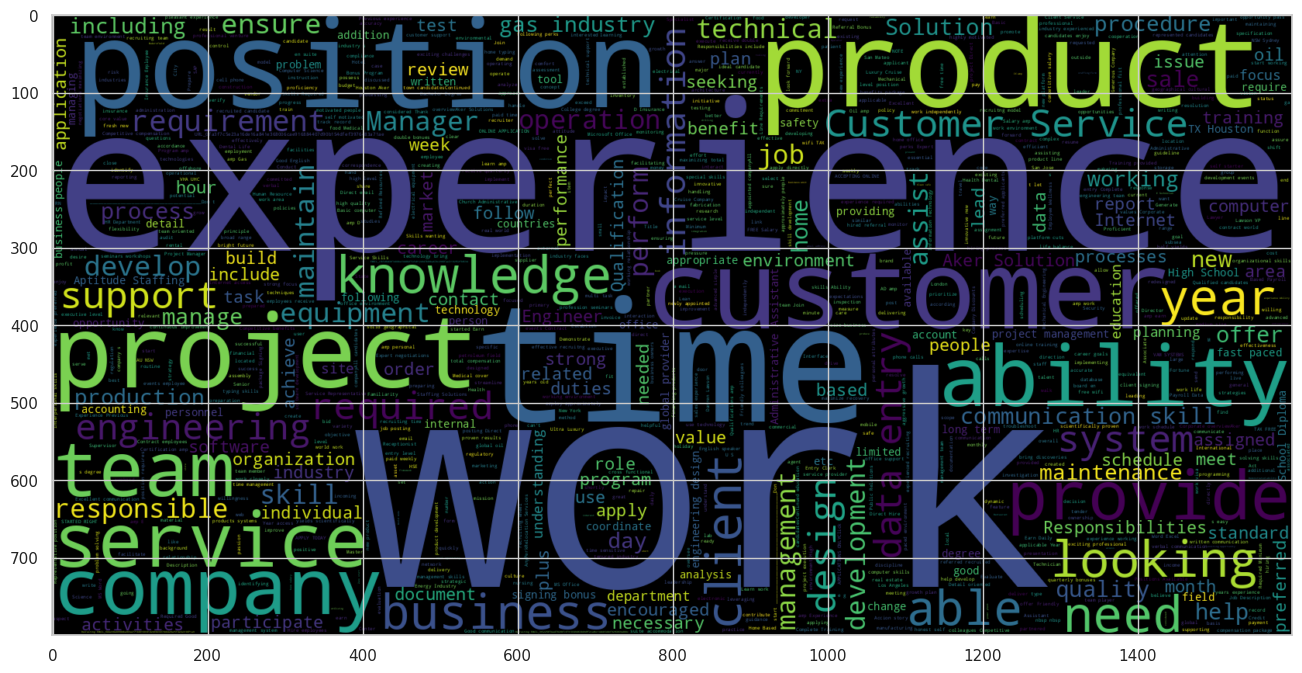

In [204]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')


Actual jobs wordcloud

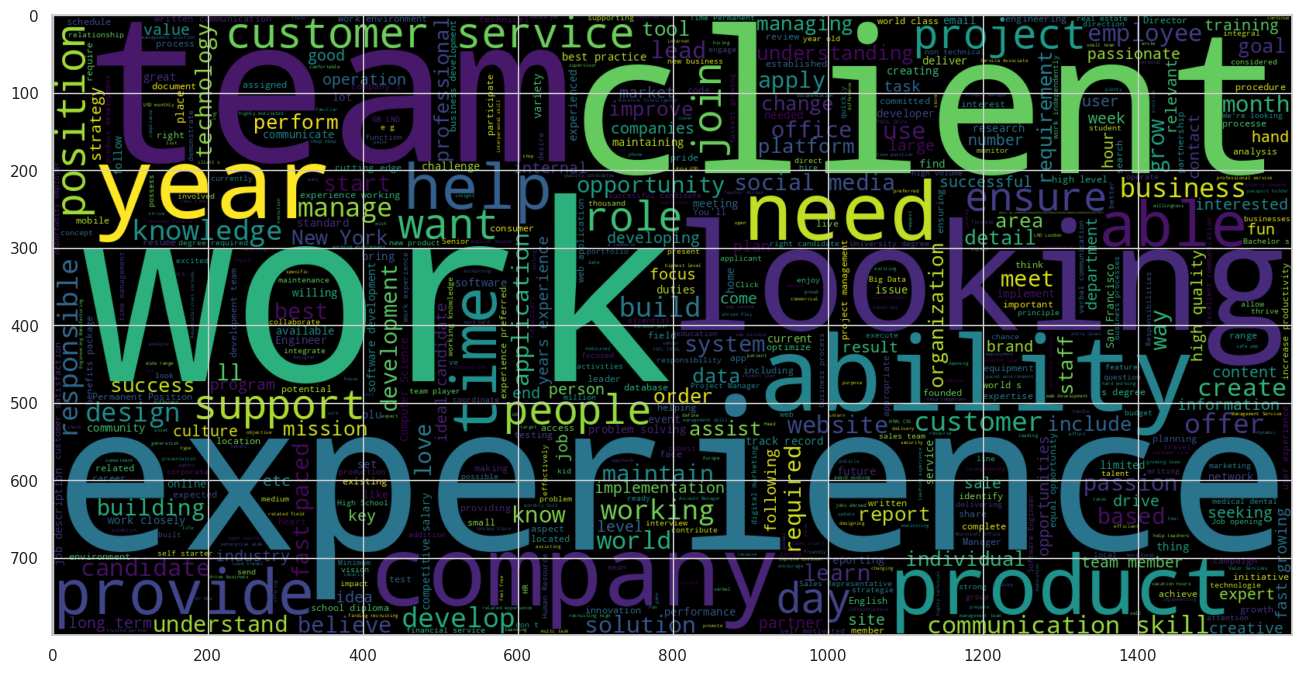

In [205]:

plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [206]:

punctuations = string.punctuation


 Create our list of stopwords


In [207]:
nlp = spacy.load("en_core_web_sm")

In [208]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS

Load English tokenizer, tagger, parser, NER and word vectors

In [209]:
parser = English()

Creating our tokenizer function


In [210]:
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)

    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    return mytokens

class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}
def clean_text(text):

    return text.strip().lower()

In [211]:
data["text"]= data["text"].apply(clean_text)


In [212]:
cv = TfidfVectorizer(max_features=100)
x = cv.fit_transform(data['text'])

data1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())
data.drop(["text"], axis=1, inplace=True)
main_data =pd.concat([data1,data], axis=1)

In [213]:
main_data.head()


,ability,about,all,also,amp,an,and,are,as,at,based,be,best,business,but,by,can,client,clients,communication,company,customer,customers,data,design,development,do,environment,experience,for,from,full,has,have,help,high,if,in,including,industry,...,product,products,project,provide,quality,re,required,sales,service,services,skills,software,solutions,strong,support,team,technical,technology,that,the,their,this,through,time,to,up,us,we,web,well,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.040922,0.000000,0.042219,0.036312,0.000000,0.751597,0.000000,0.078274,0.000000,0.000000,0.000000,0.042864,0.034014,0.039936,0.130365,0.000000,0.000000,0.000000,0.036943,0.031230,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.023298,0.081063,0.000000,0.039712,0.085713,0.054063,0.00000,0.000000,0.0,0.237620,0.000000,0.000000,...,0.00000,0.0,0.000000,0.000000,0.000000,0.129095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127359,0.053447,0.0,0.040840,0.000000,0.290230,0.069279,0.000000,0.000000,0.032030,0.183118,0.000000,0.024611,0.203960,0.000000,0.040005,0.00000,0.000000,0.185171,0.050739,0.067701,0.000000,0.000000,0.000000,0.000000,0
1,0.021899,0.094202,0.035399,0.024297,0.041796,0.029777,0.490997,0.056638,0.060062,0.052432,0.043406,0.043653,0.000000,0.078300,0.000000,0.075025,0.085446,0.053211,0.048732,0.021261,0.000000,0.115070,0.000000,0.0,0.0,0.000000,0.051708,0.022008,0.093855,0.151618,0.089271,0.000000,0.098655,0.062227,0.00000,0.043782,0.0,0.193730,0.136679,0.000000,...,0.02574,0.0,0.174270,0.000000,0.050273,0.000000,0.000000,0.000000,0.220457,0.000000,0.017476,0.025826,0.000000,0.000000,0.000000,0.046138,0.0,0.000000,0.107758,0.453361,0.000000,0.070896,0.000000,0.018433,0.152222,0.000000,0.014164,0.130421,0.026817,0.000000,0.00000,0.078020,0.165769,0.043800,0.116886,0.099347,0.000000,0.204896,0.130479,0
2,0.000000,0.000000,0.176735,0.000000,0.041735,0.089200,0.396893,0.113110,0.000000,0.000000,0.000000,0.029059,0.000000,0.000000,0.000000,0.037458,0.000000,0.159401,0.000000,0.000000,0.071787,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.116459,0.035656,0.000000,0.049256,0.000000,0.00000,0.000000,0.0,0.113792,0.000000,0.050243,...,0.00000,0.0,0.058005,0.046233,0.050200,0.000000,0.000000,0.000000,0.000000,0.219788,0.069802,0.000000,0.048142,0.094559,0.048792,0.000000,0.0,0.000000,0.215201,0.524177,0.000000,0.000000,0.047991,0.000000,0.350768,0.000000,0.028286,0.026046,0.000000,0.000000,0.00000,0.062325,0.307407,0.058315,0.000000,0.000000,0.000000,0.094429,0.074450,0
3,0.023265,0.000000,0.018803,0.000000,0.000000,0.094900,0.695482,0.000000,0.031904,0.037134,0.000000,0.015458,0.000000,0.145568,0.024416,0.019926,0.000000,0.000000,0.000000,0.022586,0.019094,0.024449,0.054735,0.0,0.0,0.045657,0.054932,0.070140,0.085463,0.123902,0.000000,0.000000,0.000000,0.016527,0.02276,0.000000,0.0,0.084745,0.096801,0.053454,...,0.00000,0.0,0.000000,0.049188,0.053408,0.000000,0.024289,0.173089,0.000000,0.023383,0.018566,0.000000,0.051219,0.025151,0.025955,0.065354,0.0,0.099875,0.049062,0.278838,0.042356,0.000000,0.127646,0.019582,0.335867,0.023605,0.015047,0.069277,0.000000,0.000000,0.02313,0.049731,0.075474,0.046531,0.000000,0.105542,0.019805,0.050232,0.059406,0
4,0.000000,0.000000,0.067990,0.000000,0.040138,0.028596,0.606245,0.081587,0.115360,0.000000,0.000000,0.027948,0.094759,0.037597,0.000000,0.000000,0.000000,0.051101,0.000000,0.040835,0.069041,0.044202,0.049479,0.0,0.0,0.041272,0.000000,0.000000,0.051505,0.201607,0.000000,0.043896,0.047371,0.000000,0.00000,0.000000,0.0,0.393980,0.043753,0.000000,...,0.00000,0.0,0.000000,0.000000,0.144838,0.000000,0.000000,0.000000,0.084685,0.169104,0.000000,0.000000,0.092601,0.000000,0.000000,0.029539,0.0,0.000000,0.029567,0.274977,0.000000,0.000000,0.000000,0.035404,0.269880,0.000000,0.027204,0.050100,0.000000,0.044220,0.00000,0.000000,0.159195,0.028042,0.037417,0.000000,0.035806,0.030272,0.107403,0


 Splitting dataset in train and test

In [214]:
Y = main_data.iloc[:,-1]
X = main_data.iloc[:,:-1]

X_train , X_test , y_train , y_test = train_test_split(X,Y, test_size=0.3)


In [215]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(12516, 100)
(12516,)
(5364, 100)
(5364,)


In [216]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model= rfc.fit(X_train,y_train)



In [217]:
print(X_test)


        ability     about       all  ...     years       you      your
7949   0.093057  0.000000  0.112816  ...  0.039608  0.066975  0.039603
16284  0.385203  0.000000  0.000000  ...  0.218608  0.000000  0.000000
7918   0.000000  0.000000  0.000000  ...  0.000000  0.313699  0.092748
12548  0.086273  0.000000  0.069727  ...  0.000000  0.124184  0.000000
11815  0.102591  0.000000  0.099499  ...  0.034933  0.000000  0.017464
...         ...       ...       ...  ...       ...       ...       ...
2886   0.070197  0.000000  0.056735  ...  0.019919  0.067363  0.039833
15680  0.000000  0.000000  0.000000  ...  0.000000  0.146385  0.000000
1461   0.155395  0.000000  0.041864  ...  0.022047  0.000000  0.022044
5807   0.000000  0.000000  0.089122  ...  0.000000  0.158725  0.093857
16966  0.000000  0.104606  0.000000  ...  0.000000  0.000000  0.082794

[5364 rows x 100 columns]


In [218]:

pred = rfc.predict(X_test)
score = accuracy_score(y_test,pred)
score

0.9735272184936614

In [219]:
print("classification Report\n")
print(classification_report(y_test, pred))
print("confusion_matrix\n")
print(confusion_matrix(y_test , pred))


classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5120
           1       1.00      0.42      0.59       244

    accuracy                           0.97      5364
   macro avg       0.99      0.71      0.79      5364
weighted avg       0.97      0.97      0.97      5364

confusion_matrix

[[5120    0]
 [ 142  102]]


In [220]:
## THANK YOU